# PCA - Principal Component Analysis

**Problem**: you have a multidimensional set of data and you want to see which points are closest to others.

PCA allows you to identify the dimensions of greatest variance, to the dimensions of least variance. PCA1 has greatest variance.

## Example

Let's look at a dataset that has nothing to do with networks: measurements of flowers, specifically Irises.

In [1]:
from sklearn import datasets
# NumPy for numerical operations
import numpy as np
iris = datasets.load_iris()

In [2]:
iris.get("feature_names")

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
# PCA from scikit-learn for dimensionality reduction
from sklearn.decomposition import PCA

We first initialize the PCA object. Pick a number of components

In [16]:
pca = PCA(n_components=2)

Now we fit the PCA to the dataset and apply transformation.

In [20]:
X = pca.fit_transform(iris.data)

Now we can plot the latent space. Do you see clustering?

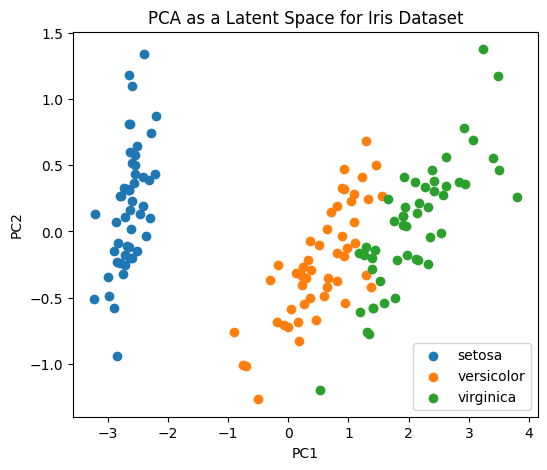

In [22]:
plt.figure(figsize=(6,5))
for i in range(3):
    plt.scatter(X[iris.target==i, 0], X[iris.target==i, 1], label=iris.target_names[i])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA as a Latent Space for Iris Dataset")
plt.legend()
plt.show()

**Explained Variance Ratio**

Each principal component captures some amount of the total variance present in the original dataset.

The explained variance ratio tells us how much of the total variance is captured by each principal component.

It is a measure of the importance or significance of each principal component.

Plotting the explained variance ratio (or the cumulative version, for total contribution to 100% explained) helps in understanding how much variance each component captures and helps determine the number of components needed to achieve a desired level of total explained variance.

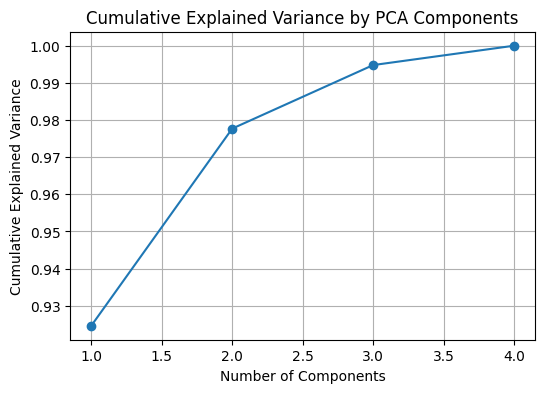

In [23]:
pca = PCA(n_components=4)
X_pca = pca.fit_transform(iris.data)

plt.figure(figsize=(6,4))
plt.plot(np.arange(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

PCA doesn't just reduce dimensionality - it also gives us a structured latent space. Each principal component defines a direction of maximal variation in the original data, and the transformed dataset lives in this new coordinate system. This means we sample points in this low-dimensional PCA space and then project them back to approximate what new (but plausible) data would look like in the original space.

In [25]:
# Reduce and reconstruct using PCA
pca_2 = PCA(n_components=2)
X_reduced = pca_2.fit_transform(iris.data)
X_reconstructed = pca_2.inverse_transform(X_reduced)

# Compare original vs reconstructed
print("Original sample:", iris.data[0])
print("Reconstructed sample:", X_reconstructed[0])

Original sample: [5.1 3.5 1.4 0.2]
Reconstructed sample: [5.08303897 3.51741393 1.40321372 0.21353169]


Later, when we study VAEs, we’ll build on this idea with a probabilistic model that learns to sample realistic data points directly from a learned distribution over the latent space.

# PCA of small molecule drugs
Now we will perform a PCA on a more domain specific dataset - small molecule drugs. We will try to see if there are differences between different classes of drugs in the projected chemical space.

(Notebook adapted from Samo Turk, Jan. 2017)

In [26]:
!pip install rdkit-pypi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 34.2 MB/s eta 0:00:00


In [28]:
# NumPy for numerical operations
import numpy as np
# Pandas for data handling
import pandas as pd
# Import RDKit for molecular representations
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import IPythonConsole

In [33]:
# Pandas for data handling
import pandas as pd
df = pd.read_csv("chembl_drugs.txt.gz", sep="\t")
df.head()

,PARENT_MOLREGNO,CHEMBL_ID,SYNONYMS,DEVELOPMENT_PHASE,RESEARCH_CODES,APPLICANTS,USAN_STEM,USAN_STEM_DEFINITION,USAN_STEM_SUBSTEM,USAN_YEAR,...,PRODRUG,ORAL,PARENTERAL,TOPICAL,BLACK_BOX,AVAILABILITY_TYPE,WITHDRAWN_YEAR,WITHDRAWN_COUNTRY,WITHDRAWN_REASON,CANONICAL_SMILES
0,675015,CHEMBL1201064,"Fluorometholone Acetate (FDA, USAN)",4,U-17323,Alcon Laboratories Inc,-olone,steroids (not prednisolone derivatives),-olone,1984.0,...,Y,N,N,Y,N,Prescription-only,NaN,NaN,NaN,C[C@H]1C[C@H]2[C@@H]3CC[C@](OC(=O)C)(C(=O)C)[C...
1,112655,CHEMBL1009,"Levodopa (BAN, FDA, INN, JAN, USAN, USP)",4,NaN,Shire Development Inc; Orion Pharma; Merck Sha...,-dopa,dopamine receptor agonists,-dopa,1969.0,...,N,Y,N,N,N,Prescription-only,NaN,NaN,NaN,N[C@@H](Cc1ccc(O)c(O)c1)C(=O)O
2,993371,CHEMBL1569487,"Lornoxicam (BAN, INN, USAN)",3,Ro-139297,"Cl Pharma Ag, Austria",-icam,anti-inflammatory agents (isoxicam type),-icam,1993.0,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CN1C(=C(O)c2sc(Cl)cc2S1(=O)=O)C(=O)Nc3ccccn3
3,435293,CHEMBL270190,"Alvimopan (BAN, FDA, INN, USAN)",4,ADL 8-2698,Cubist Pharmaceuticals Inc,NaN,NaN,NaN,2002.0,...,N,Y,N,N,Y,Prescription-only,NaN,NaN,NaN,C[C@H]1CN(C[C@H](Cc2ccccc2)C(=O)NCC(=O)O)CC[C@...
4,246,CHEMBL9,"Norfloxacin (BAN, FDA, INN, JAN, USAN, USP)",4,MK-366,Merck Research Laboratories Div Merck Co Inc,-oxacin,antibacterials (quinolone derivatives),-oxacin,1984.0,...,N,Y,N,Y,Y,Prescription-only,NaN,NaN,NaN,CCN1C=C(C(=O)O)C(=O)c2cc(F)c(cc12)N3CCNCC3


Load the table of drugs (downloaded from [ChEMBL](https://www.ebi.ac.uk/chembl/) )

This is a set of bioactive drug-like molecules in the ChEMBL database. Each row is a drug, and the columns contain various properties of that compound.


In [35]:
len(df)

11442

Keep only compounds with SMILES, [USAN stems](https://www.ama-assn.org/about-us/united-states-adopted-names-approved-stems), that respect [Ro5](https://en.wikipedia.org/wiki/Lipinski's_rule_of_five) and are on the market. (clean up the set)

In [36]:
df = df[df['CANONICAL_SMILES'].notnull() & # Keep cpds with SMILES
        df['USAN_STEM'].notnull() & # USAN stem
        (df['RULE_OF_FIVE'] == 'Y') & # that respect Ro5
        (df['DEVELOPMENT_PHASE'] == 4)] # are on the market

In [37]:
len(df)

700

Add molecule column

In [38]:
PandasTools.AddMoleculeColumnToFrame(df, smilesCol='CANONICAL_SMILES')

Failed to patch pandas - unable to change molecule rendering


In [39]:
df = df[~df['ROMol'].isnull()]

In [ ]:
len(df)

700

Check most common compound classes (based on USAN stem)

In [41]:
common_stems = df.groupby('USAN_STEM').size().sort_values()[-10:]
common_stems

,0
USAN_STEM,
-pin(e),12
-tinib,12
-olone,12
-ium,14
-caine,15
-vir,15
-cillin,17
-oxacin,17
-olol,18


In [42]:
stems = df.drop_duplicates(['USAN_STEM'])[df.drop_duplicates(['USAN_STEM'])['USAN_STEM'].isin(common_stems.index)][['USAN_STEM','USAN_STEM_DEFINITION']]
stems.index = stems['USAN_STEM']
stems['count'] = common_stems

In [ ]:
stems

,USAN_STEM,USAN_STEM_DEFINITION,count
USAN_STEM,,,
-olone,-olone,steroids (not prednisolone derivatives),12
-oxacin,-oxacin,antibacterials (quinolone derivatives),17
-pin(e),-pin(e),tricyclic compounds,12
-tinib,-tinib,tyrosine kinase inhibitors,12
-caine,-caine,local anesthetics,15
sulfa-,sulfa-,antimicrobials (sulfonamides derivatives),18
-vir,-vir,antivirals: antivirals (acyclovir type),15
-ium,-ium,quaternary ammonium derivatives,14
-cillin,-cillin,penicillins,17


Helper functions

In [43]:
from rdkit import DataStructs
from rdkit.Chem import AllChem

class FP:
    """
    Molecular fingerprint class, useful to pack features in pandas df

    Parameters
    ----------
    fp : np.array
        Features stored in numpy array
    names : list, np.array
        Names of the features
    """
    def __init__(self, fp, names):
        self.fp = fp
        self.names = names
    def __str__(self):
        return "%d bit FP" % len(self.fp)
    def __len__(self):
        return len(self.fp)

def get_cfps(mol, radius=2, nBits=1024, useFeatures=False, counts=False, dtype=np.float32):
    """Calculates circular (Morgan) fingerprint.
    http://rdkit.org/docs/GettingStartedInPython.html#morgan-fingerprints-circular-fingerprints

    Parameters
    ----------
    mol : rdkit.Chem.rdchem.Mol
    radius : float
        Fingerprint radius, default 2
    nBits : int
        Length of hashed fingerprint (without descriptors), default 1024
    useFeatures : bool
        To get feature fingerprints (FCFP) instead of normal ones (ECFP), defaults to False
    counts : bool
        If set to true it returns for each bit number of appearances of each substructure (counts). Defaults to false (fingerprint is binary)
    dtype : np.dtype
        Numpy data type for the array. Defaults to np.float32 because it is the default dtype for scikit-learn

    Returns
    -------
    ML.FP
        Fingerprint (feature) object
    """
    arr = np.zeros((1,), dtype)

    if counts is True:
        info = {}
        fp = AllChem.GetHashedMorganFingerprint(mol, radius, nBits, useFeatures=useFeatures)
        DataStructs.ConvertToNumpyArray(fp, arr)
    else:
        DataStructs.ConvertToNumpyArray(AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=nBits, useFeatures=useFeatures), arr)
    return FP(arr, range(nBits))

Calculate fingerprints

In [ ]:
df['FP'] = df['ROMol'].map(get_cfps)

Extract compounds that belong to 10 most common USAN stems

In [ ]:
df_small = df[df['USAN_STEM'].isin(list(stems.index))].copy()

In [ ]:
len(df_small)

150

### PCA analysis

In [ ]:
# PCA from scikit-learn for dimensionality reduction
from sklearn.decomposition import PCA

In [ ]:
X = np.array([x.fp for x in df_small['FP']])

In [ ]:
pca = PCA(n_components=3, random_state=0)
pca_drugs = pca.fit_transform(X)

In [ ]:
df_small['PC1'] = pca_drugs.T[0]
df_small['PC2'] = pca_drugs.T[1]
df_small['PC3'] = pca_drugs.T[2]

In [ ]:
# Matplotlib for plotting
import matplotlib.pyplot as plt
import seaborn as sns

Plot principal components

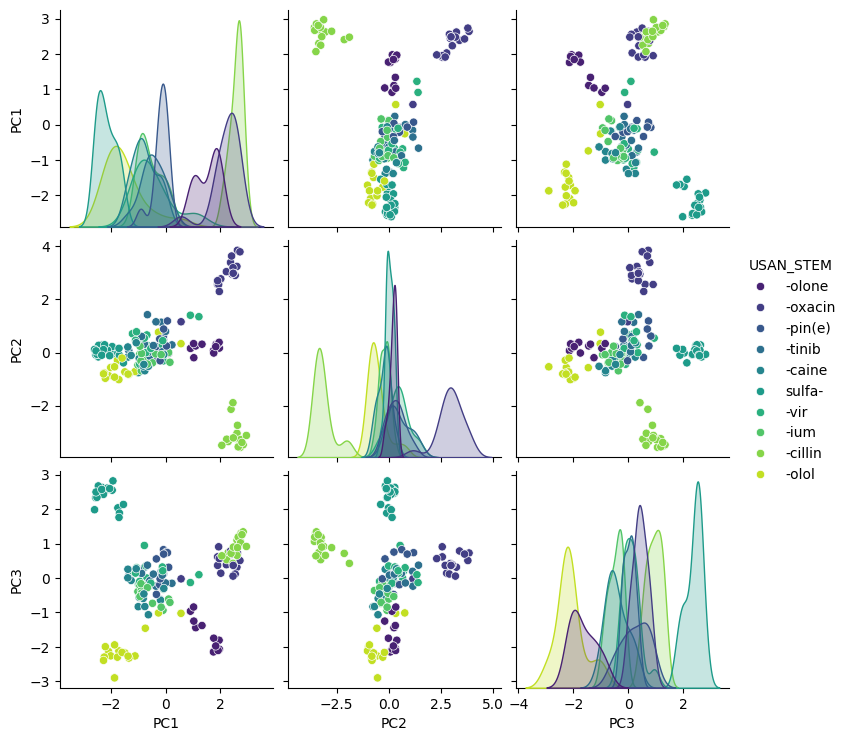

In [ ]:
#doctest: IGNORE
sns.pairplot(df_small, hue='USAN_STEM', vars=['PC1', 'PC2', 'PC3'], palette='viridis');